In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
import cv2
import os

In [2]:
import os
test_train_path = 'C:\\Users\\karan\\Desktop\\Rahul-Codes\\directory\\DataSciencePython\\DeepLearning\\CNN\\notebooks\\intel'
os.listdir(test_train_path)

['seg_pred', 'seg_test', 'seg_train']

In [3]:

train_path = test_train_path+'\\seg_train\\seg_train'

In [4]:
test_path = test_train_path+'\\seg_test\\seg_test'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
image_gen = ImageDataGenerator(width_shift_range=0.10,
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1,
                               zoom_range=0.1,
                               fill_mode='nearest')

In [7]:
image_gen.flow_from_directory(train_path)

Found 14034 images belonging to 6 classes.


In [8]:
image_gen.flow_from_directory(test_path)

Found 3000 images belonging to 6 classes.


In [9]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [10]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=4)

In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau


reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001, verbose = 1)

In [13]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=(150,150),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                batch_size=64,
                                               )

Found 14034 images belonging to 6 classes.


In [14]:

test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=(150,150),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                batch_size=64,
                                                shuffle=False
                                               )

Found 3000 images belonging to 6 classes.


In [81]:
train_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [21]:
results = model.fit_generator(train_image_gen,validation_data=test_image_gen,callbacks=[early_stop,reduce],epochs=20)

Epoch 1/20
220/220 [==============================] - 1195s 5s/step - loss: 1.0967 - accuracy: 0.5700 - val_loss: 0.8379 - val_accuracy: 0.6847
Epoch 2/20
220/220 [==============================] - 1130s 5s/step - loss: 0.8460 - accuracy: 0.6811 - val_loss: 0.7061 - val_accuracy: 0.7193
Epoch 3/20
220/220 [==============================] - 1127s 5s/step - loss: 0.7397 - accuracy: 0.7272 - val_loss: 0.7346 - val_accuracy: 0.7423
Epoch 4/20
220/220 [==============================] - 1147s 5s/step - loss: 0.6706 - accuracy: 0.7593 - val_loss: 0.5603 - val_accuracy: 0.8013
Epoch 5/20
220/220 [==============================] - 1131s 5s/step - loss: 0.6249 - accuracy: 0.7758 - val_loss: 0.5252 - val_accuracy: 0.8107
Epoch 6/20
220/220 [==============================] - 1122s 5s/step - loss: 0.5696 - accuracy: 0.7993 - val_loss: 0.5270 - val_accuracy: 0.8043
Epoch 7/20
220/220 [==============================] - 1127s 5s/step - loss: 0.5450 - accuracy: 0.8040 - val_loss: 0.5072 - val_accuracy:

In [16]:
train_image_gen1 = image_gen.flow_from_directory(train_path,
                                                target_size=(150,150),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                batch_size=16,
                                               )

Found 14034 images belonging to 6 classes.


In [17]:

test_image_gen1 = image_gen.flow_from_directory(test_path,
                                                target_size=(150,150),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                batch_size=16,
                                                shuffle=False
                                               )

Found 3000 images belonging to 6 classes.


In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle

In [18]:
#OUTPUT FILES FOR FUTURE PREDICTIONS


from tensorflow.keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')





In [19]:
results1 = model.fit_generator(train_image_gen1,validation_data=test_image_gen1,callbacks=[early_stop,checkpoint],epochs=20)  

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
878/878 [==============================] - ETA: 0s - loss: 1.1306 - accuracy: 0.5430
Epoch 00001: loss improved from inf to 1.13063, saving model to nextword1.h5
878/878 [==============================] - 1461s 2s/step - loss: 1.1306 - accuracy: 0.5430 - val_loss: 1.0202 - val_accuracy: 0.6090
Epoch 2/20
878/878 [==============================] - ETA: 0s - loss: 0.8547 - accuracy: 0.6733
Epoch 00002: loss improved from 1.13063 to 0.85471, saving model to nextword1.h5
878/878 [==============================] - 1172s 1s/step - loss: 0.8547 - accuracy: 0.6733 - val_loss: 0.7912 - val_accuracy: 0.7137
Epoch 3/20
878/878 [==============================] - ETA: 0s - loss: 0.7282 - accuracy: 0.7371
Epoch 00003: loss improved from 0.85471 to 0.72820, saving model to nextword1.h5
878/878 [==============================] - 1169s 1s/step - loss: 0.7282 - accuracy: 0.7371 - val_loss: 0.6020 - val_accuracy: 0.787

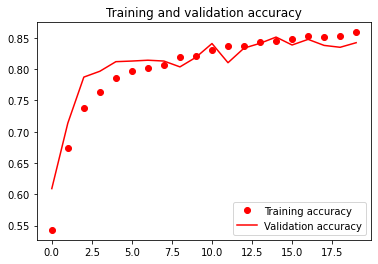

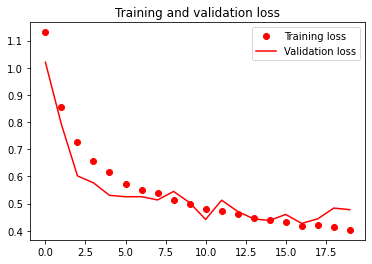

In [22]:
#test_eval5 = mdl5.evaluate(test_X, test_Y_one_hot, verbose=0)

#print('Test loss:', test_eval5[0])
#print('Test accuracy:', test_eval5[1])

accuracy = results1.history['accuracy']
val_accuracy = results1.history['val_accuracy']
loss = results1.history['loss']
val_loss = results1.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
pred_prob = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [24]:
pred_prob

array([[9.99984860e-01, 3.96088717e-09, 5.16228944e-08, 3.37869843e-09,
        2.69093583e-08, 1.51447530e-05],
       [4.79624361e-01, 1.26815678e-04, 1.34581962e-04, 2.15307796e-06,
        1.28447355e-05, 5.20099282e-01],
       [9.76820230e-01, 1.60854925e-05, 4.50867956e-04, 4.15621907e-05,
        2.21274397e-03, 2.04584636e-02],
       ...,
       [2.71240659e-02, 3.70549634e-02, 5.37769310e-02, 3.47257912e-01,
        4.83914852e-01, 5.08712083e-02],
       [6.80515349e-01, 3.24069624e-05, 4.63239354e-04, 1.78012192e-06,
        3.28805123e-04, 3.18658501e-01],
       [2.43094824e-02, 1.59646384e-04, 9.35541393e-05, 1.56710229e-07,
        2.56015710e-06, 9.75434601e-01]], dtype=float32)

In [25]:
predictions = np.argmax(pred_prob,axis=1)

In [26]:
predictions

array([0, 5, 0, ..., 4, 0, 5], dtype=int64)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.72      0.91      0.81       437
           1       0.96      0.97      0.97       474
           2       0.83      0.77      0.80       553
           3       0.79      0.79      0.79       525
           4       0.88      0.79      0.83       510
           5       0.87      0.83      0.85       501

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.85      0.84      0.84      3000



In [28]:
print(confusion_matrix(test_image_gen.classes,predictions))

[[398   1   0   2   4  32]
 [  7 459   1   2   1   4]
 [ 22   4 427  68  24   8]
 [ 19   3  61 416  20   6]
 [ 33   3  22  34 403  15]
 [ 70   6   1   2   5 417]]


In [70]:
test_image_gen1.samples



3000

In [29]:
img_name = '101.jpg'

In [37]:
pred_img_path = f'C:\\Users\\karan\\Desktop\\Rahul-Codes\\directory\\DataSciencePython\\DeepLearning\\CNN\\notebooks\\intel\\seg_pred\\seg_pred\\{img_name}'


In [38]:
from tensorflow.keras.preprocessing import image

In [40]:
pred_img = image.load_img(pred_img_path,target_size=(150,150))

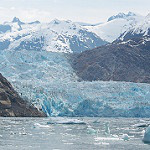

In [41]:
pred_img

In [42]:
pred_img_arr = image.img_to_array(pred_img)

In [43]:
pred_img_arr.shape

(150, 150, 3)

In [44]:
pred_img_arr = pred_img_arr.reshape(1,150,150,3)

In [45]:
pred_img_arr.shape

(1, 150, 150, 3)

In [46]:

classno = np.argmax(model.predict(pred_img_arr))

In [47]:
class_dict = train_image_gen.class_indices

In [48]:
class_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [52]:
for key in class_dict:
    if class_dict[key] == classno:
        print(key)

buildings
